# MNIST Classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## (1) The `MNIST` Dataset

In [2]:
from tensorflow.keras import datasets


# Loading the MNIST Dataset...
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data(path="mnist.npz")

# The train set contains 60 000 images, each of them of size 28x28
# The test set contains 10 000 images, each of them of size 28x28
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

2023-02-15 17:09:22.393415: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

###  Exploring the dataset

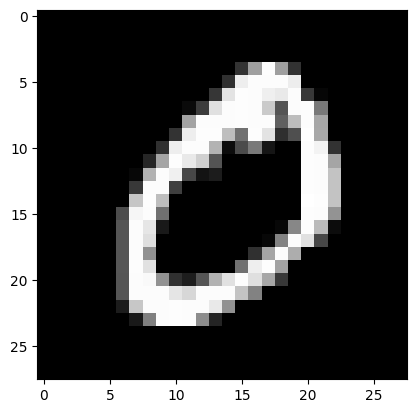

In [3]:
import matplotlib.pyplot as plt

plt.imshow(X_train[1], cmap = 'gray')

###  Image Preprocessing

In [4]:
#Normalize
X_train = X_train/255
X_test = X_test/255

###  Inputs' dimensionality

In [5]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
from tensorflow.keras.backend import expand_dims

#Expand dimensions to fit correct format for NN input
X_train = expand_dims(X_train)
X_test = expand_dims(X_test)

2023-02-15 17:09:26.987308: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
X_train.shape

TensorShape([60000, 28, 28, 1])

### Target encoding

In [8]:
from tensorflow.keras.utils import to_categorical

#One-hot-encode target class
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [9]:
# Quick check that shape is correct
assert(y_train_cat.shape == (60000,10))
assert(y_test_cat.shape == (10000,10))

The data is now ready to be used. ✅

## The Convolutional Neural Network

### Architecture and compilation of a CNN

In [10]:
from tensorflow.keras import layers
from tensorflow.keras import models


def initialize_model():

    model = models.Sequential()

    # First Convolution & MaxPooling
    model.add(layers.Conv2D(
        8, 
        (4,4), 
        input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]), 
        activation="relu",
        padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    
    # Second Convolution & MaxPooling
    model.add(layers.Conv2D(16, (3,3), activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    
    # Flattening
    model.add(layers.Flatten())
    
    # One Fully Connected layer - "Fully Connected" is equivalent to saying "Dense"
    model.add(layers.Dense(10, activation='relu'))
    
    # Last layer - Classification Layer with 10 outputs corresponding to 10 digits
    model.add(layers.Dense(10, activation='softmax'))
    
    # Model compilation
    # Categorical_crossentropy loss for classification task of >2 categories & adam optimizer
    model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    
    return model

### Summary and visualizations

In [11]:
model = initialize_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         136       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 10)                5

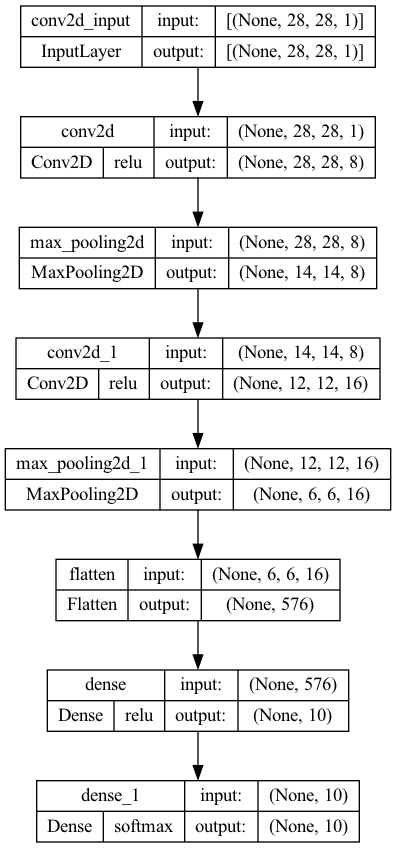

In [12]:
import visualkeras
from tensorflow.keras.utils import plot_model

plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=True,
    show_layer_activations=True
)

In [13]:
visualkeras.layered_view(model, legend=True, spacing=30).show()

### Training the CNN

In [14]:
from tensorflow.keras.callbacks import EarlyStopping

#Train CNN with early stopping criterion and validation split
es = EarlyStopping(patience=3)

model.fit(X_train, 
          y_train_cat, 
          batch_size=16,
          epochs=1000, 
          callbacks=[es],
          validation_split=0.3,)

Epoch 1/1000
2625/2625 [==============================] - 15s 5ms/step - loss: 0.2604 - accuracy: 0.9204 - val_loss: 0.1316 - val_accuracy: 0.9609
Epoch 2/1000
2625/2625 [==============================] - 16s 6ms/step - loss: 0.0946 - accuracy: 0.9703 - val_loss: 0.0979 - val_accuracy: 0.9711
Epoch 3/1000
2625/2625 [==============================] - 13s 5ms/step - loss: 0.0707 - accuracy: 0.9780 - val_loss: 0.0750 - val_accuracy: 0.9773
Epoch 4/1000
2625/2625 [==============================] - 14s 5ms/step - loss: 0.0595 - accuracy: 0.9817 - val_loss: 0.0683 - val_accuracy: 0.9779
Epoch 5/1000
2625/2625 [==============================] - 15s 6ms/step - loss: 0.0488 - accuracy: 0.9849 - val_loss: 0.0676 - val_accuracy: 0.9801
Epoch 6/1000
2625/2625 [==============================] - 13s 5ms/step - loss: 0.0426 - accuracy: 0.9866 - val_loss: 0.0715 - val_accuracy: 0.9780
Epoch 7/1000
2625/2625 [==============================] - 13s 5ms/step - loss: 0.0366 - accuracy: 0.9887 - val_loss: 0

### Evaluating its performance

In [15]:
#Evaluate accuracy on the test dataset
accuracy = model.evaluate(X_test, y_test_cat)[1]

313/313 [==============================] - 1s 2ms/step - loss: 0.0544 - accuracy: 0.9846


Happily ending this project with an accuracy of 98% 🙀✅
